### Treść zadania

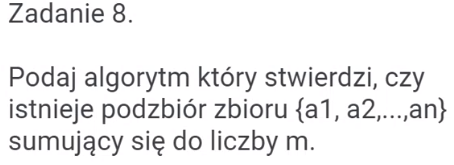

### Omówienie

Problem plecakowy - było jako obowiązkowe zadanie na 1. ćwiczenia z programowania dynamicznego.

###### UWAGA:
W tym zadaniu trzeba założyć, że zbiór jest zbiorem liczb naturalnych dodatnich (jak są zera, to je odrzucamy, więc 0 teoretycznie też może być, więc trzeba by je odfiltrować, aby zmniejszyć złożoność obliczeniową).

### Złożoność

###### Obliczeniowa
$ O(n \cdot m) $, gdzie $ n $ - liczba liczb w zbiorze (tablicy), $ m $ - szukana suma,
###### Pamięciowa
##### Implementacja #1
$ O(n \cdot m) $, gdzie $ n $ - liczba liczb w zbiorze (tablicy), $ m $ - szukana suma,
##### Implementacja #2
$ O(m) $

### Implementacja #1
#### (Gorsza - zużywa dużo więcej pamięci i działa wolniej, bo zawsze wypełnia całą tablicę i dopiero potem kończy działanie)

In [1]:
def filter_values(A: 'set of values', m: 'target sum'):
    A_cp = []
    for val in A:
        if 0 < val <= m:
            A_cp.append(val)
    return A_cp


def subset_sum(A: 'set of values', m: 'target sum'):
    A = filter_values(A, m)
    n = len(A)
    F = [[False] * (m + 1) for _ in range(n)]
    
    # Set the first column to True (we will always be able to
    # create a subset of sum equal to 0 (e.g. an ampry subset)
    for i in range(n):
        F[i][0] = True
        
    # Set the first value possible to obtain to True
    F[0][A[0]] = True
    
    # Fill the remaining cells with proper values (True wil indicate that
    # we can obtain a sum of values equal to 'j', where 'j' is a column
    # index, only by using some of the first 'i' + 1 values (some of values
    # from index 0 to index 'i' inclusive from an 'A' array)
    for i in range(1, n):
        for j in range(1, m + 1):
            if A[i] <= j:
                F[i][j] = F[i - 1][j] or F[i - 1][j - A[i]]
            else:
                F[i][j] = F[i - 1][j]
    
    # REMOVE ME
    print(*('  '.join(u'□' if F[i][j] else ' ' for j in range(m + 1)) for i in range(n)), sep='\n')
    
    return F[n - 1][m]

###### Kilka testów

In [2]:
A = [2, 5, 1, 3, 8]
m = 19

print(subset_sum(A, m))

□     □                                                   
□     □        □     □                                    
□  □  □  □     □  □  □  □                                 
□  □  □  □  □  □  □  □  □  □  □  □                        
□  □  □  □  □  □  □  □  □  □  □  □  □  □  □  □  □  □  □  □
True


### Implementacja #2
#### (Lepsza - działa tylko na tablicy 1-wymiarowej i zwraca rozwiązanie od razu po jego znalezieniu)

In [3]:
def filtered_values(A, T):
    new_A = []
    for val in A:
        if 0 < val <= T:
            new_A.append(val)
    return new_A

    
def sub_sum(A, T):
    if T < 0 or not A: return False
    if T < 2:
        for num in A:
            if num == T: return True
        return False
    
    # Filter zeros and excessive values out of the array as they don't change the sum
    # or cannot be taken and it is pointless to perform calculations for rows with them
    A = filtered_values(A, T)
    
    n = len(A)
    # Create the initial row of values
    F = [False] * (T + 1)
    F[0] = True
    for i in range(1, T + 1):
        F[i] = A[0] == i
        
    # Loop over the remaining values and check if the subsequence sums up to T
    for i in range(1, n):
#         print(A[i])
        # Go from right in order not to overwrite values which will be processed
        # later
        for j in range(T, 0, -1):
            if not F[j] and A[i] <= j:
                F[j] = F[j - A[i]]
            if F[T]: 
                # REMOVE ME
                print('  '.join(u'□' if F[j] else ' ' for j in range(T + 1)))
                return True
        # REMOVE ME
        print('  '.join(u'□' if F[j] else ' ' for j in range(T + 1)))
            
    return False

###### Kilka testów

In [4]:
A = [2, 5, 1, 3, 8]
m = 19

print(sub_sum(A, m))

□     □        □     □                                    
□  □  □  □     □  □  □  □                                 
□  □  □  □  □  □  □  □  □  □  □  □                        
□  □  □  □  □  □  □  □  □  □  □  □                       □
True
